<a href="https://colab.research.google.com/github/szh141/mlproject/blob/main/Calories_ML_20240527.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://medium.com/@iabbasali/calories-burnt-prediction-using-machine-learning-fbbae3050379

In [10]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Colab images/Data/exercise.csv')
print(df.shape)
df.head()

(15000, 9)


,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190,94,29,105,40.8,231
1,14861698,female,20,166,60,14,94,40.3,66
2,11179863,male,69,179,79,5,88,38.7,26
3,16180408,female,34,179,71,13,100,40.5,71
4,17771927,female,27,154,58,10,81,39.8,35


In [5]:
df.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  int64  
 4   Weight      15000 non-null  int64  
 5   Duration    15000 non-null  int64  
 6   Heart_Rate  15000 non-null  int64  
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 1.0+ MB


In [7]:
df.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [11]:
df['Gender'].value_counts()

Gender
female    7553
male      7447
Name: count, dtype: int64

In [12]:
from matplotlib import pyplot as plt

(array([512., 497., 489., 411., 426., 435., 452., 396., 390., 379., 325.,
        339., 370., 320., 285., 327., 279., 283., 311., 276., 260., 252.,
        257., 250., 259., 233., 233., 223., 219., 208., 220., 197., 225.,
        201., 217., 204., 190., 177., 182., 198., 172., 181., 180., 182.,
        176., 169., 147., 162., 150., 145., 154., 163., 137., 167., 142.,
        117., 139., 130., 133., 147.]),
 array([20.        , 20.98333333, 21.96666667, 22.95      , 23.93333333,
        24.91666667, 25.9       , 26.88333333, 27.86666667, 28.85      ,
        29.83333333, 30.81666667, 31.8       , 32.78333333, 33.76666667,
        34.75      , 35.73333333, 36.71666667, 37.7       , 38.68333333,
        39.66666667, 40.65      , 41.63333333, 42.61666667, 43.6       ,
        44.58333333, 45.56666667, 46.55      , 47.53333333, 48.51666667,
        49.5       , 50.48333333, 51.46666667, 52.45      , 53.43333333,
        54.41666667, 55.4       , 56.38333333, 57.36666667, 58.35      ,
      

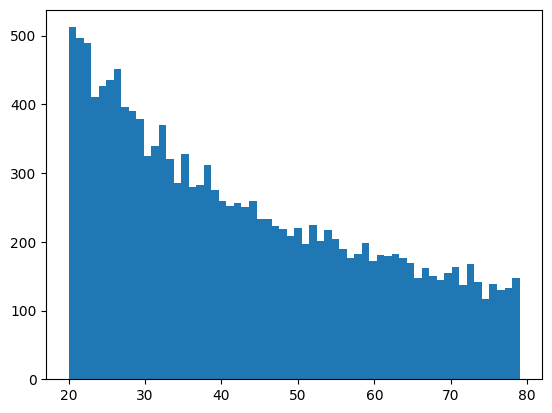

In [18]:
plt.hist(df['Age'],bins=60)

In [20]:
# check for correlation
# only need numerical columns

df_num = df.iloc[:,2:]
df_num.head()

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,68,190,94,29,105,40.8,231
1,20,166,60,14,94,40.3,66
2,69,179,79,5,88,38.7,26
3,34,179,71,13,100,40.5,71
4,27,154,58,10,81,39.8,35


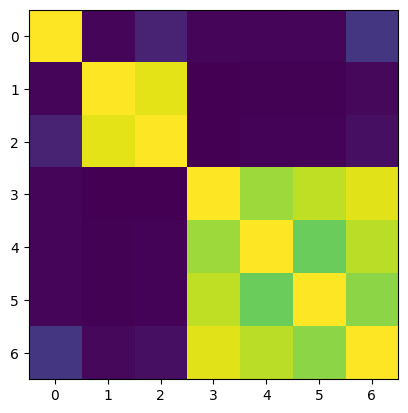

In [22]:
plt.imshow(df_num.corr())

In [24]:
y = df['Calories']
X = df.drop(columns=['Calories', 'User_ID','Gender'])
# I also dropped 'Gender'

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=123)

X_train.shape, X_test.shape # ((12000, 7), (3000, 7))

y_train.shape, y_test.shape # ((12000,), (3000,))

((12000,), (3000,))

In [26]:
from xgboost import XGBRegressor
xgbr = XGBRegressor()
xgbr.fit(X_train, y_train)
xgbr_prediction = xgbr.predict(X_test)

In [27]:
from sklearn.metrics import mean_absolute_error as mae, r2_score as r2

xgbr_mae = mae(y_test, xgbr_prediction)
xgbr_mae # 1.4849313759878278 (Wow, the error is extremely LOW)

xgbr_r2 = r2(y_test, xgbr_prediction)
xgbr_r2 # 0.9988308899957399 (Score is really GOOD)

0.9959288581422808